In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3


### Connect to the Database

In [90]:
# Connect to Chinook DB
conn = sqlite3.connect('Chinook_Sqlite.sqlite')

# Test read
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)


             name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track


## Top-Selling Products

In [91]:
# Top-Selling Products
query_top_products = """
SELECT t.Name AS TrackName,
       SUM(il.Quantity) AS TotalQuantity
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
GROUP BY t.Name
ORDER BY TotalQuantity DESC
LIMIT 10;
"""
top_products = pd.read_sql_query(query_top_products, conn)




### visualization

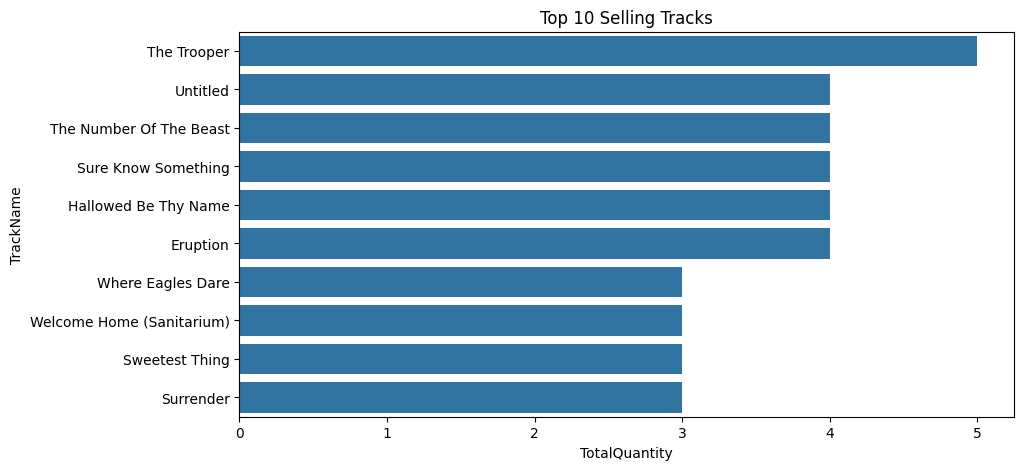

In [92]:
plt.figure(figsize=(10,5))
sns.barplot(x="TotalQuantity", y="TrackName", data=top_products)
plt.title("Top 10 Selling Tracks")
plt.show()

## Revenue by Country

In [93]:
query_revenue_country = """
SELECT c.Country,
       ROUND(SUM(il.UnitPrice * il.Quantity), 2) AS TotalRevenue
FROM InvoiceLine il
JOIN Invoice i ON il.InvoiceId = i.InvoiceId
JOIN Customer c ON i.CustomerId = c.CustomerId
GROUP BY c.Country
ORDER BY TotalRevenue DESC;
"""
revenue_country = pd.read_sql_query(query_revenue_country, conn)
print(revenue_country)




           Country  TotalRevenue
0              USA        523.06
1           Canada        303.96
2           France        195.10
3           Brazil        190.10
4          Germany        156.48
5   United Kingdom        112.86
6   Czech Republic         90.24
7         Portugal         77.24
8            India         75.26
9            Chile         46.62
10         Ireland         45.62
11         Hungary         45.62
12         Austria         42.62
13         Finland         41.62
14     Netherlands         40.62
15          Norway         39.62
16          Sweden         38.62
17           Spain         37.62
18          Poland         37.62
19           Italy         37.62
20         Denmark         37.62
21         Belgium         37.62
22       Australia         37.62
23       Argentina         37.62


### Visualization

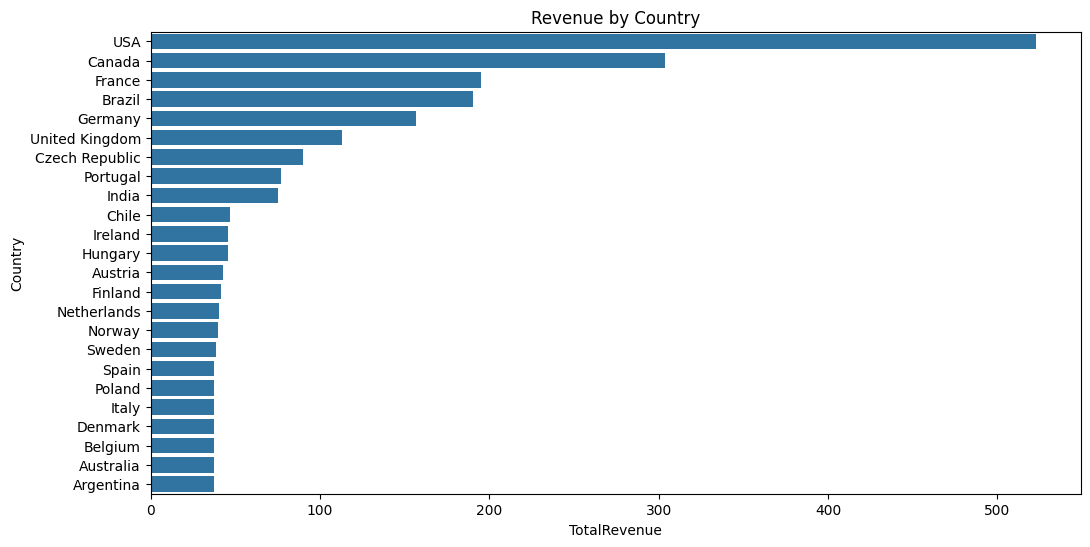

In [94]:

plt.figure(figsize=(12,6))
sns.barplot(x="TotalRevenue", y="Country", data=revenue_country)
plt.title("Revenue by Country")
plt.show()

## Monthly Revenue

In [95]:
query_monthly_revenue = """
SELECT STRFTIME('%Y-%m', i.InvoiceDate) AS Month,
       ROUND(SUM(il.UnitPrice * il.Quantity), 2) AS MonthlyRevenue
FROM InvoiceLine il
JOIN Invoice i ON il.InvoiceId = i.InvoiceId
GROUP BY Month
ORDER BY Month;
"""
monthly_revenue = pd.read_sql_query(query_monthly_revenue, conn)
print(monthly_revenue)



      Month  MonthlyRevenue
0   2009-01           35.64
1   2009-02           37.62
2   2009-03           37.62
3   2009-04           37.62
4   2009-05           37.62
5   2009-06           37.62
6   2009-07           37.62
7   2009-08           37.62
8   2009-09           37.62
9   2009-10           37.62
10  2009-11           37.62
11  2009-12           37.62
12  2010-01           52.62
13  2010-02           46.62
14  2010-03           44.62
15  2010-04           37.62
16  2010-05           37.62
17  2010-06           37.62
18  2010-07           37.62
19  2010-08           37.62
20  2010-09           36.63
21  2010-10           37.62
22  2010-11           37.62
23  2010-12           37.62
24  2011-01           37.62
25  2011-02           37.62
26  2011-03           37.62
27  2011-04           51.62
28  2011-05           42.62
29  2011-06           50.62
30  2011-07           37.62
31  2011-08           37.62
32  2011-09           37.62
33  2011-10           37.62
34  2011-11         

### Visualization

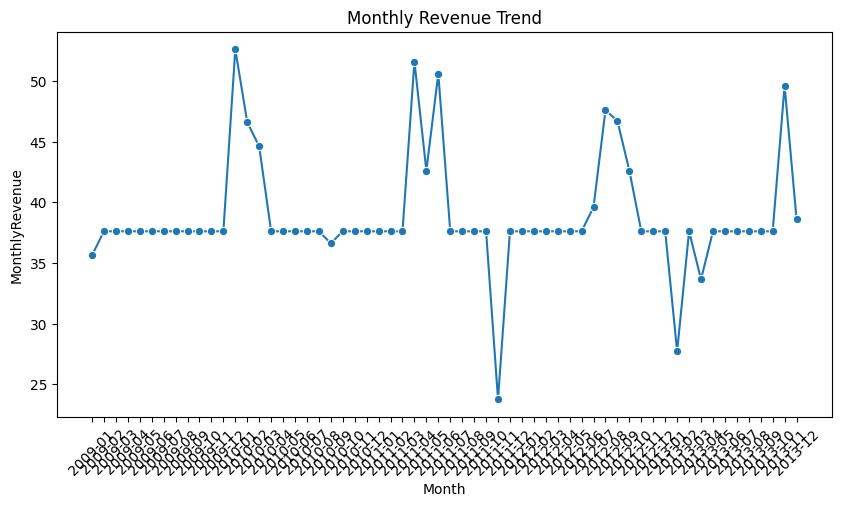

In [96]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month", y="MonthlyRevenue", data=monthly_revenue, marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.show()


## Window Function: Top 3 Tracks per Customer


In [97]:
query_window = """
SELECT CustomerName, TrackName, TrackRevenue, TrackRank
FROM (
    SELECT c.FirstName || ' ' || c.LastName AS CustomerName,
           t.Name AS TrackName,
           SUM(il.UnitPrice * il.Quantity) AS TrackRevenue,
           RANK() OVER (PARTITION BY c.CustomerId ORDER BY SUM(il.UnitPrice * il.Quantity) DESC) AS TrackRank
    FROM InvoiceLine il
    JOIN Invoice i ON il.InvoiceId = i.InvoiceId
    JOIN Customer c ON i.CustomerId = c.CustomerId
    JOIN Track t ON il.TrackId = t.TrackId
    GROUP BY c.CustomerId, t.TrackId
)
WHERE TrackRank <= 3;
"""
top_tracks_per_customer = pd.read_sql_query(query_window, conn)
print(top_tracks_per_customer.head(20))


      CustomerName                                          TrackName  \
0   Luís Gonçalves                                  Take the Celestra   
1   Luís Gonçalves                                Experiment In Terra   
2   Luís Gonçalves                           Fantasia On Greensleeves   
3   Luís Gonçalves  Karelia Suite, Op.11: 2. Ballade (Tempo Di Men...   
4   Luís Gonçalves                           All Along The Watchtower   
5   Luís Gonçalves                                           Paranoid   
6   Luís Gonçalves                                  Flying High Again   
7   Luís Gonçalves                              Mama, I'm Coming Home   
8   Luís Gonçalves                               Será Que Vai Chover?   
9   Luís Gonçalves                                           Meu Erro   
10  Luís Gonçalves                                        Cinema Mudo   
11  Luís Gonçalves                                         Saber Amar   
12  Luís Gonçalves                            Mensa

## Genre popularity by Sales

In [98]:
query_genre_sales = """
SELECT g.Name AS GenreName,
       SUM(il.Quantity) AS TotalQuantity
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Genre g ON t.GenreId = g.GenreId
GROUP BY g.Name
ORDER BY TotalQuantity DESC;
"""
genre_sales = pd.read_sql_query(query_genre_sales, conn)



### Visualization

/var/folders/sr/d72dbv1s6391v4pc2pwkkhtc0000gn/T/ipykernel_12944/4035830742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


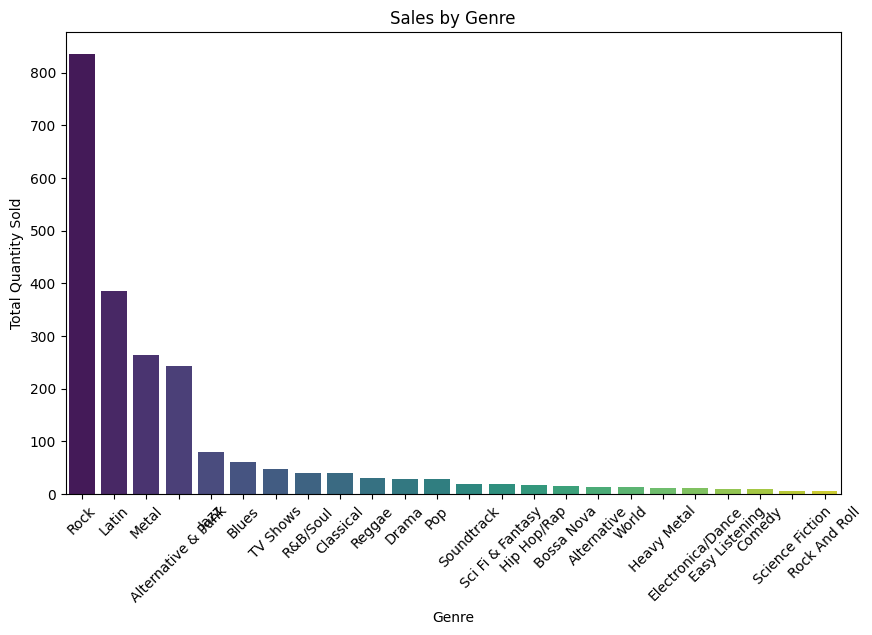

In [106]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="GenreName",
    y="TotalQuantity",
    data=genre_sales,
    palette="viridis"
)
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Total Quantity Sold")
plt.title("Sales by Genre")
plt.show()




## Revenue by Artist

In [100]:
query_artist_revenue = """
SELECT ar.Name AS ArtistName,
       ROUND(SUM(il.UnitPrice * il.Quantity), 2) AS TotalRevenue
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Album al ON t.AlbumId = al.AlbumId
JOIN Artist ar ON al.ArtistId = ar.ArtistId
GROUP BY ar.Name
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
artist_revenue = pd.read_sql_query(query_artist_revenue, conn)

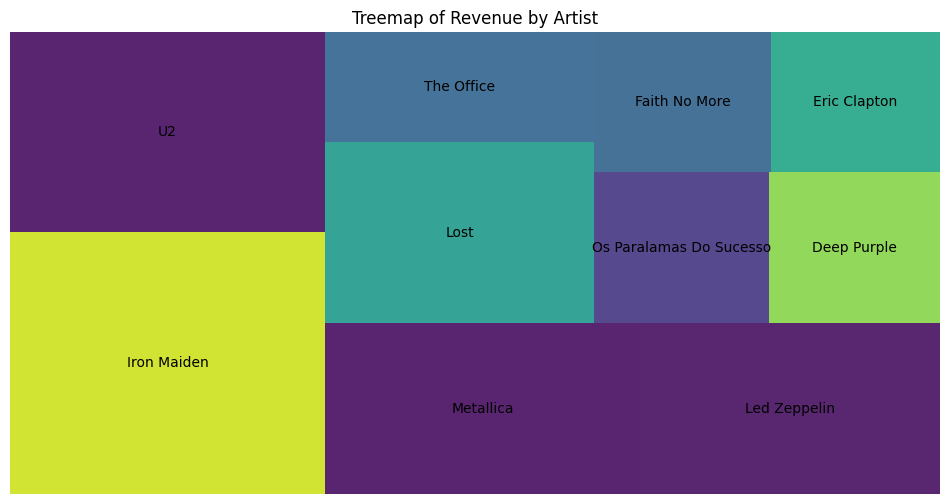

In [101]:
import squarify
plt.figure(figsize=(12,6))
squarify.plot(sizes=artist_revenue["TotalRevenue"], label=artist_revenue["ArtistName"], alpha=.9)
plt.axis('off')
plt.title("Treemap of Revenue by Artist")
plt.show()


## Stacked Area chart ; Genre sale over time

<Figure size 1200x600 with 0 Axes>

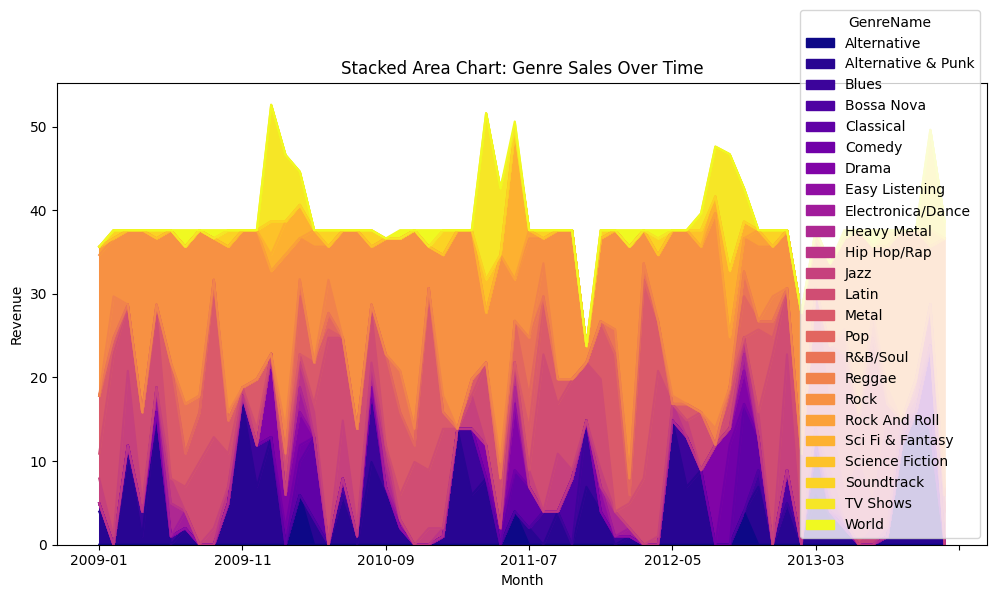

In [102]:
pivot_area = genre_month.pivot(index="Month", columns="GenreName", values="TotalRevenue").fillna(0)

plt.figure(figsize=(12,6))
pivot_area.plot(kind="area", stacked=True, figsize=(12,6), colormap="plasma")
plt.title("Stacked Area Chart: Genre Sales Over Time")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()
